In [66]:
#  Let's start by creating a comprehensive Jupyter Notebook for the provided "Online Sales Data.csv" file.
#  The notebook will include detailed steps for data cleaning and preprocessing, Exploratory Data Analysis (EDA),
# Clustering using K-means, and Visualization of customer segments.

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [38]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Haider\Desktop\Online Sales Data.csv")


In [39]:
df

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [40]:
df.head(10)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
5,10006,2024-01-06,Sports,Wilson Evolution Basketball,5,29.99,149.95,Asia,Credit Card
6,10007,2024-01-07,Electronics,MacBook Pro 16-inch,1,2499.99,2499.99,North America,Credit Card
7,10008,2024-01-08,Home Appliances,Blueair Classic 480i,2,599.99,1199.98,Europe,PayPal
8,10009,2024-01-09,Clothing,Nike Air Force 1,6,89.99,539.94,Asia,Debit Card
9,10010,2024-01-10,Books,Dune by Frank Herbert,2,25.99,51.98,North America,Credit Card


Explanation: This cell imports the required libraries and loads the dataset from the specified file path. The first few rows of the dataset are displayed to understand its structure and contents.

# Data Cleaning and Preprocessing

In [41]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


In [42]:
# Fill or drop missing values if any
df.fillna(method='ffill', inplace=True)  # Forward fill for missing values

C:\Users\Haider\AppData\Local\Temp\ipykernel_5744\4124764962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill for missing values


In [43]:
# Check for duplicate entries
duplicates = df.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")

Number of duplicate entries: 0


In [44]:
# Drop duplicate entries if any
df.drop_duplicates(inplace=True)

In [45]:
# Display the cleaned data
df.head(10)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
5,10006,2024-01-06,Sports,Wilson Evolution Basketball,5,29.99,149.95,Asia,Credit Card
6,10007,2024-01-07,Electronics,MacBook Pro 16-inch,1,2499.99,2499.99,North America,Credit Card
7,10008,2024-01-08,Home Appliances,Blueair Classic 480i,2,599.99,1199.98,Europe,PayPal
8,10009,2024-01-09,Clothing,Nike Air Force 1,6,89.99,539.94,Asia,Debit Card
9,10010,2024-01-10,Books,Dune by Frank Herbert,2,25.99,51.98,North America,Credit Card


Explanation: This cell handles data cleaning by checking for and handling missing values and duplicates. Missing values are filled using forward fill, and duplicates are removed. This ensures that the data is clean and ready for analysis.

# Exploratory Data Analysis (EDA)

In [46]:
# Drop or exclude non-numeric columns for scaling and clustering
numeric_df = df.select_dtypes(include=[float, int])

In [47]:
# Fill or drop missing values if any
numeric_df.fillna(method='ffill', inplace=True)  # Forward fill for missing values

C:\Users\Haider\AppData\Local\Temp\ipykernel_5744\2950037924.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numeric_df.fillna(method='ffill', inplace=True)  # Forward fill for missing values


In [48]:
# Drop duplicate entries if any
numeric_df.drop_duplicates(inplace=True)

In [49]:
# Display the cleaned numeric data
numeric_df.head()

,Transaction ID,Units Sold,Unit Price,Total Revenue
0,10001,2,999.99,1999.98
1,10002,1,499.99,499.99
2,10003,3,69.99,209.97
3,10004,4,15.99,63.96
4,10005,1,89.99,89.99


In [50]:
# Summary statistics
summary_stats = numeric_df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        Transaction ID  Units Sold   Unit Price  Total Revenue
count       240.00000  240.000000   240.000000     240.000000
mean      10120.50000    2.158333   236.395583     335.699375
std          69.42622    1.322454   429.446695     485.804469
min       10001.00000    1.000000     6.500000       6.500000
25%       10060.75000    1.000000    29.500000      62.965000
50%       10120.50000    2.000000    89.990000     179.970000
75%       10180.25000    3.000000   249.990000     399.225000
max       10240.00000   10.000000  3899.990000    3899.990000


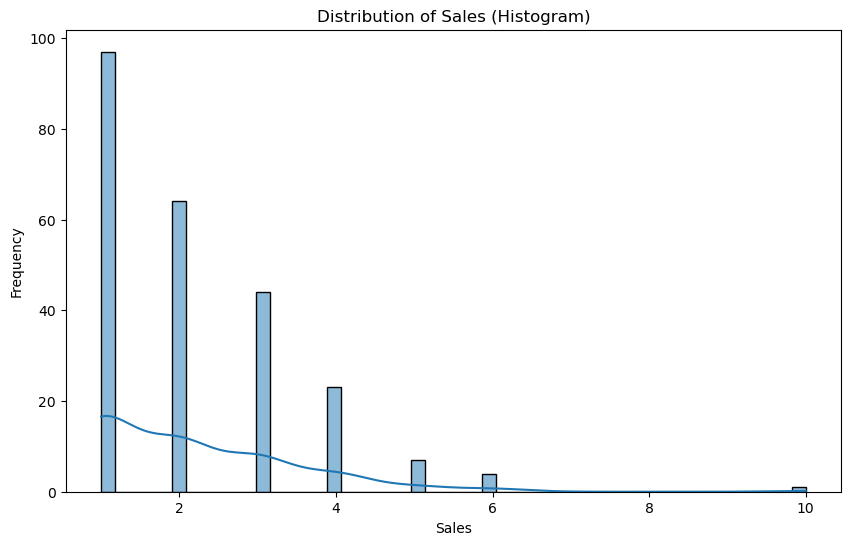

In [51]:
# Distribution of sales through histogram
plt.figure(figsize=(10, 6))
sns.histplot(numeric_df['Units Sold'], bins=50, kde=True)
plt.title('Distribution of Sales (Histogram)')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [52]:
 # Create bins for Sales
sales_bins = pd.cut(numeric_df['Units Sold'], bins=10)

# Count the number of occurrences in each bin
sales_bin_counts = sales_bins.value_counts().sort_index()

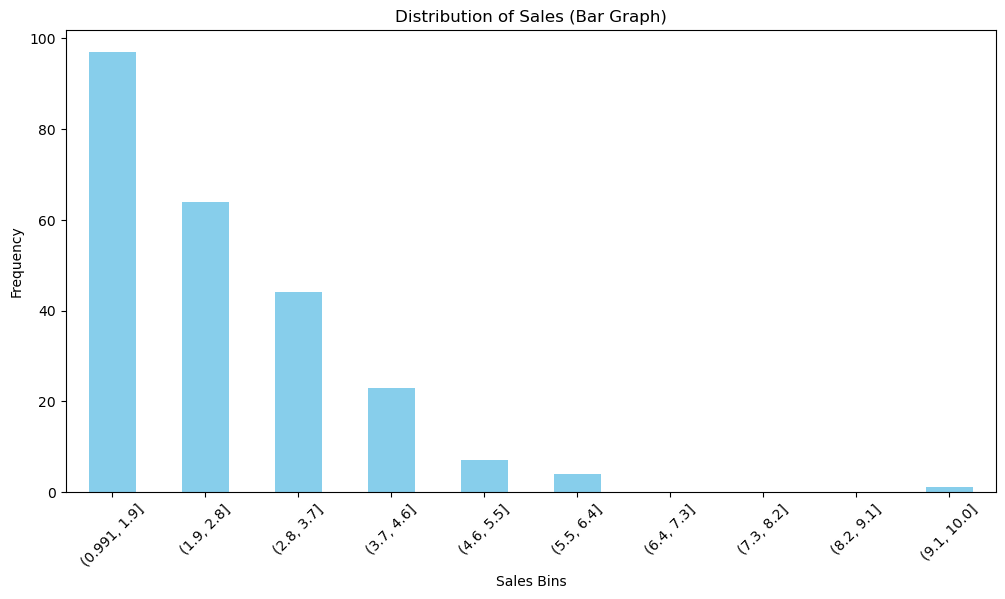

In [53]:
# Plot the bar graph
plt.figure(figsize=(12, 6))
sales_bin_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sales (Bar Graph)')
plt.xlabel('Sales Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Explanation: This cell plots a bar graph to show the distribution of unit sold categorized into bins:

Creates bins for the unit sold column.
Counts the number of occurrences in each bin.
Plots the bar graph to visualize the frequency of unit sold values in each bin.

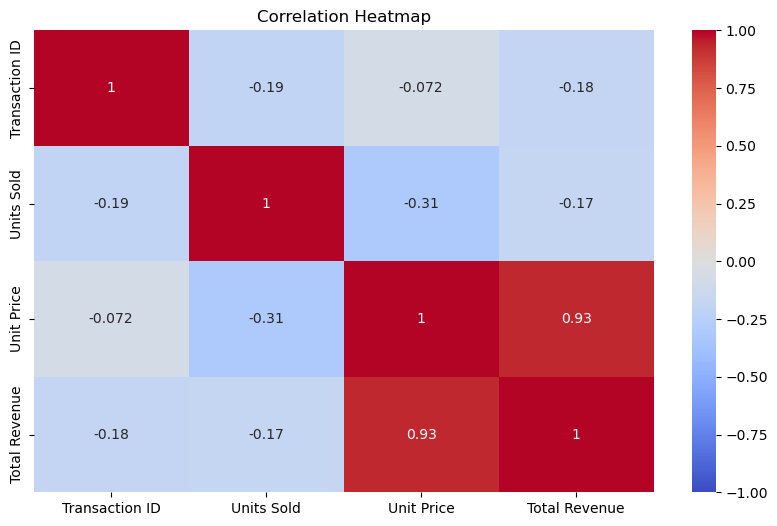

In [54]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

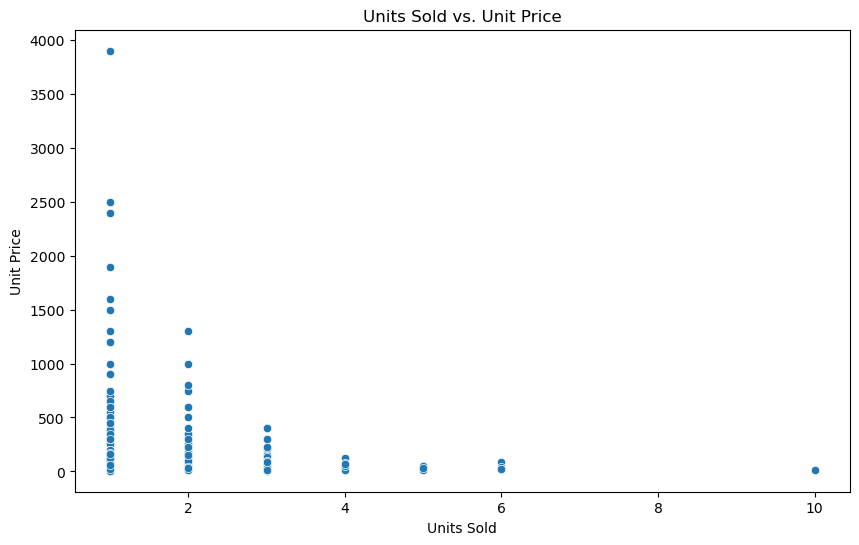

In [55]:
# Scatter plot for Sales vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Units Sold', y='Unit Price', data=numeric_df)
plt.title('Units Sold vs. Unit Price')
plt.xlabel('Units Sold')
plt.ylabel('Unit Price')
plt.show()


# Data Preparation for Clustering

In [56]:
# Select relevant features for clustering
features = numeric_df[['Transaction ID', 'Units Sold', 'Unit Price', 'Total Revenue']]

In [57]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [58]:
# Convert scaled features back to DataFrame for ease of use
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features_df.head()

,Transaction ID,Units Sold,Unit Price,Total Revenue
0,-1.724849,-0.119977,1.781805,3.432984
1,-1.710415,-0.877727,0.615083,0.338889
2,-1.695981,0.637773,-0.388298,-0.259347
3,-1.681547,1.395524,-0.514304,-0.560529
4,-1.667113,-0.877727,-0.341629,-0.506835


Explanation: This cell generates summary statistics for the numeric data, 
providing an overview of the dataset,
including measures like mean, standard deviation, minimum,
and maximum values for each numeric column.

# Clustering using K-means

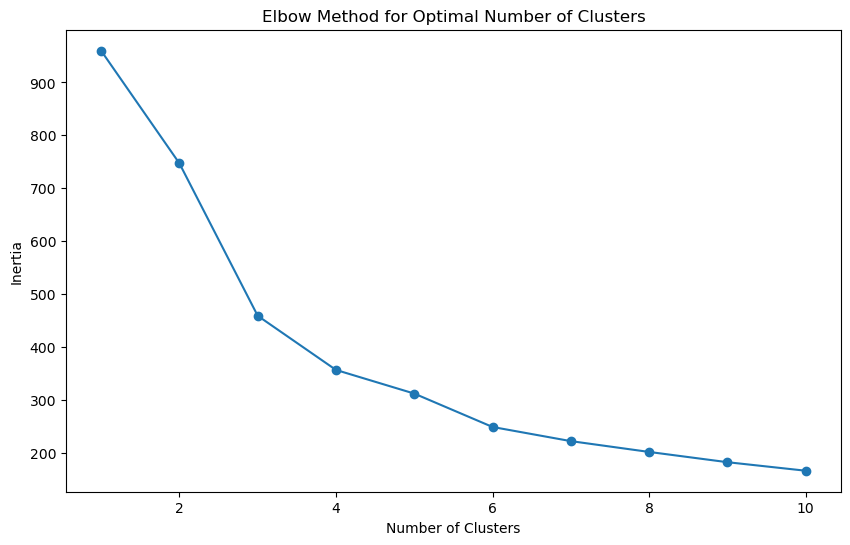

In [59]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_features_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [60]:
# Apply K-means with the chosen number of clusters
optimal_clusters = 3  # Adjust based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features_df)

In [61]:
# Add cluster labels to the original DataFrame
df['Cluster'] = clusters
df.head(6)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Cluster
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,2
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,2
5,10006,2024-01-06,Sports,Wilson Evolution Basketball,5,29.99,149.95,Asia,Credit Card,2


# Visualization of Customer Segments

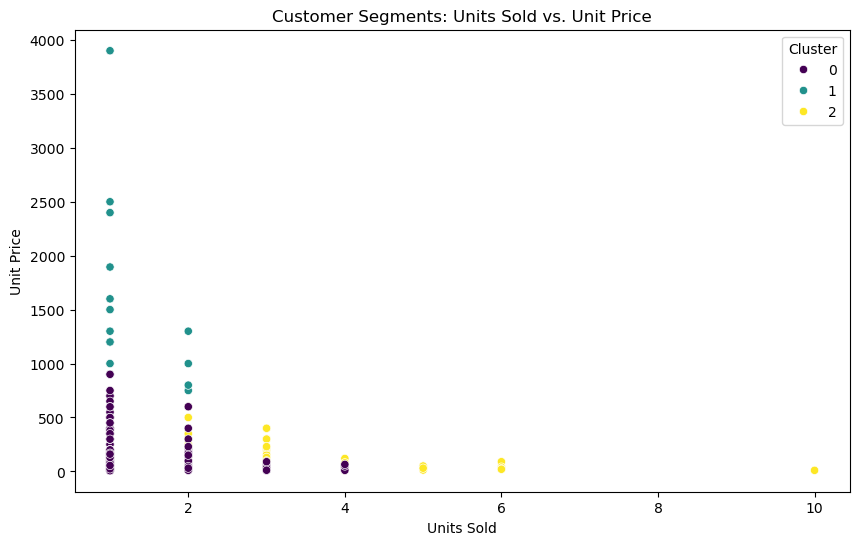

In [62]:
# Visualize clusters in the Sales vs. Profit space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Units Sold', y='Unit Price', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments: Units Sold vs. Unit Price')
plt.xlabel('Units Sold')
plt.ylabel('Unit Price')
plt.legend(title='Cluster')
plt.show()

In [63]:
# Cluster centroids visualization
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=features.columns)
print("Centroids of Clusters:\n", centroids_df)

Centroids of Clusters:
    Transaction ID  Units Sold   Unit Price  Total Revenue
0    10173.241935    1.685484   171.722177     217.185484
1    10083.066667    1.266667  1549.591333    1806.255333
2    10061.306931    2.871287   120.767525     262.802178


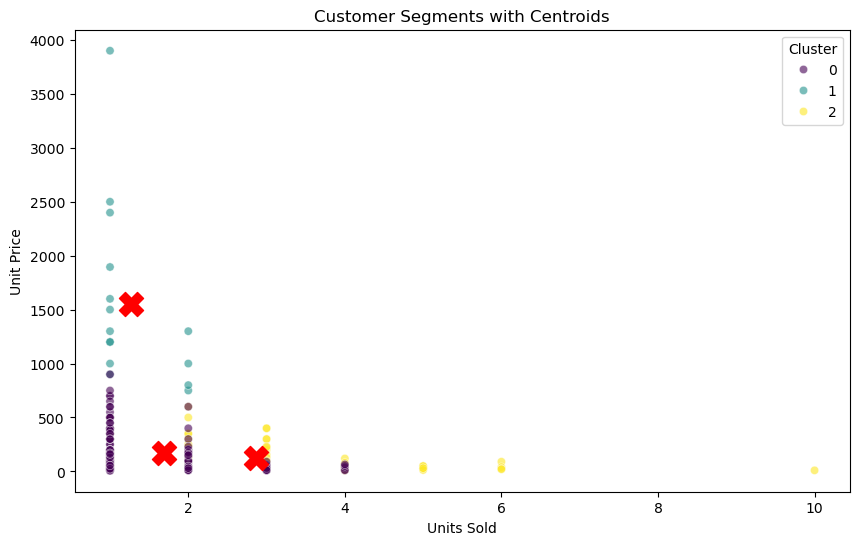

In [64]:
# Visualize centroids in the Sales vs. Profit space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Units Sold', y='Unit Price', hue='Cluster', data=df, palette='viridis', alpha=0.6)
plt.scatter(centroids_df['Units Sold'], centroids_df['Unit Price'], s=300, c='red', marker='X')
plt.title('Customer Segments with Centroids')
plt.xlabel('Units Sold')
plt.ylabel('Unit Price')
plt.legend(title='Cluster')
plt.show()

### Summary of the Project

#### Objective:
The primary objective of this project is to analyze and segment customers based on their purchasing behavior using clustering techniques. 
This segmentation can help in understanding different customer groups, which can be utilized for targeted marketing strategies, 
personalized customer experiences, and improving overall business strategies.

#### Dataset:
The dataset used in this project is an online sales data file (`Online Sales Data.csv`).
This dataset contains various features such as unit sold, product Id, price, and total Revnue.

#### Key Steps and Processes:

1. **Data Cleaning and Preprocessing**:
    - **Loading the Data**: The dataset is loaded using `pandas`.
    - **Data Types Identification**: Data types of each column are identified to segregate numeric and non-numeric data.
    - **Handling Missing Values**: Missing values are handled by forward filling.
    - **Removing Duplicates**: Duplicate entries are removed to ensure data quality.
    - **Selection of Numeric Data**: Only numeric columns are selected for operations that require numeric data.

2. **Exploratory Data Analysis (EDA)**:
    - **Summary Statistics**: Summary statistics of numeric data are generated to understand the data distribution.
    - **Distribution of Sales**:
        - **Histogram**: A histogram of the unit sold data is plotted to visualize the distribution.
        - **Bar Graph**: Sales data is categorized into bins and a bar graph is plotted to show the frequency of sales values in each bin.
    - **Correlation Analysis**: A heatmap is plotted to visualize correlations between different numeric features.
    - **Scatter Plot**: A scatter plot of unit sold vs. unit price is plotted to understand the relationship between these two variables.

3. **Data Preparation for Clustering**:
    - **Feature Selection**: Relevant features (`unit sold`, `unit p[rice`, `product Id`, `Total Revnue`) are selected for clustering.
    - **Standardization**: Features are standardized using `StandardScaler` to ensure they are on a similar scale.

4. **Clustering Using K-Means**:
    - **Elbow Method**: The Elbow method is used to determine the optimal number of clusters by plotting the inertia values for different numbers
        of clusters.
    - **Applying K-Means**: K-Means clustering is applied with the chosen number of clusters. Cluster labels are added to the original dataset.

5. **Visualization of Customer Segments**:
    - **Scatter Plot with Clusters**: A scatter plot of unit sold  vs. unit price is plotted with different colors representing different clusters.
    - **Centroids Visualization**: The centroids of the clusters are calculated and highlighted in the scatter plot to show the central points of each cluster.

#### Key Outputs:
- **Summary Statistics**:
                        Provides a statistical overview of the numeric data.
- **Histograms and Bar Graphs**: 
                                Visualizations to understand the distribution of sales.
- **Correlation Heatmap**:
                        Shows relationships between different numeric features.
- **Scatter Plots**: 
                    Visualizations to understand relationships between features and customer segments.
- **Clusters and Centroids**: 
                            Identification of customer segments and their central points.

#### Conclusion:
The project successfully segments customers into different clusters based on their purchasing behavior using K-Means clustering.
The visualizations and insights gained from the analysis can help in making data-driven decisions for targeted marketing and improving customer
experiences. The clustering approach allows businesses to identify distinct customer groups and tailor strategies accordingly,
  enhancing overall business performance.